In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('cleaned_data.csv')

# Create X and y
X = df.drop(['Margin', 'Shot_Result', 'Player_Name', 'Closest_Defender'], axis=1)
y = df['Shot_Result']

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model and train it (Logistic Regression)
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred = lr.predict(X_test)

# Evaluate the performance of the model (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Obtain the formula and weights used
intercept = lr.intercept_[0]
coefficients = lr.coef_[0]
formula = f"y = {intercept} + "
for feature, coef in zip(X.columns, coefficients):
    formula += f"({coef} * {feature}) + "
formula = formula[:-3]  # Remove the last '+'
print("Formula:", formula)
print("Weights:", coefficients)

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': lr.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)



Accuracy: 0.6027305469469805
Formula: y = 0.0027819116294482494 + (0.005053374980810872 * Location) + (0.038523396359940225 * W) + (-0.0011774465270383734 * Shot_No) + (-7.79414899443117e-06 * Game_Clock) + (0.021736572897763158 * Shot_Clock) + (0.00977609565904749 * Dribbles) + (-0.03990551217374559 * Touch_Time) + (-0.06167224046502629 * Shot_Dist) + (0.009696318503813696 * Pts_Type) + (0.11024069389296905 * Close_Def_Dist)
Weights: [ 5.05337498e-03  3.85233964e-02 -1.17744653e-03 -7.79414899e-06
  2.17365729e-02  9.77609566e-03 -3.99055122e-02 -6.16722405e-02
  9.69631850e-03  1.10240694e-01]

Feature Importance:
          Feature  Importance
9  Close_Def_Dist    0.110241
1               W    0.038523
4      Shot_Clock    0.021737
5        Dribbles    0.009776
8        Pts_Type    0.009696
0        Location    0.005053
3      Game_Clock   -0.000008
2         Shot_No   -0.001177
6      Touch_Time   -0.039906
7       Shot_Dist   -0.061672


C:\Users\KEITAPX20\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:

# Perform sensitivity analysis by modifying feature values
features_to_modify = ['Close_Def_Dist', 'Shot_Dist', 'Shot_Clock', 'Touch_Time']
delta_values = [-1.5, -0.25, 0, 0.25, 1.5]  # Delta values to modify the features

for feature in features_to_modify:
    print(f"\nSensitivity Analysis for {feature}:")
    for delta in delta_values:
        X_test_modified = X_test.copy()
        X_test_modified[feature] += delta

        y_pred_modified = lr.predict(X_test_modified)
        accuracy_modified = accuracy_score(y_test, y_pred_modified)
        
        print(f"Delta: {delta:.2f} | Accuracy: {accuracy_modified:.4f}")


Sensitivity Analysis for Close_Def_Dist:
Delta: -1.50 | Accuracy: 0.6096
Delta: -0.25 | Accuracy: 0.6035
Delta: 0.00 | Accuracy: 0.6027
Delta: 0.25 | Accuracy: 0.6022
Delta: 1.50 | Accuracy: 0.5892

Sensitivity Analysis for Shot_Dist:
Delta: -1.50 | Accuracy: 0.5974
Delta: -0.25 | Accuracy: 0.6028
Delta: 0.00 | Accuracy: 0.6027
Delta: 0.25 | Accuracy: 0.6035
Delta: 1.50 | Accuracy: 0.6092

Sensitivity Analysis for Shot_Clock:
Delta: -1.50 | Accuracy: 0.6037
Delta: -0.25 | Accuracy: 0.6031
Delta: 0.00 | Accuracy: 0.6027
Delta: 0.25 | Accuracy: 0.6026
Delta: 1.50 | Accuracy: 0.6022

Sensitivity Analysis for Touch_Time:
Delta: -1.50 | Accuracy: 0.5999
Delta: -0.25 | Accuracy: 0.6029
Delta: 0.00 | Accuracy: 0.6027
Delta: 0.25 | Accuracy: 0.6031
Delta: 1.50 | Accuracy: 0.6062


feature importance and the sensitivity analysis method used.

Feature Importance:
Feature importance is a technique used to determine the relevance or contribution of each feature in a machine learning model. In the case of logistic regression, the feature importance represents the magnitude of the coefficients assigned to each feature. The larger the absolute value of the coefficient, the more impact the corresponding feature has on the predicted outcome.

In the provided code, the feature importance is calculated using the coefficients obtained from the logistic regression model. The coefficients indicate the direction and strength of the relationship between each feature and the target variable. By sorting the coefficients in descending order, we can identify the most important features in the model.

Sensitivity Analysis:
Sensitivity analysis assesses the impact of changes in input variables (features) on the output (model predictions). In logistic regression, sensitivity analysis can be performed by calculating the product of the standard deviation of each feature and its corresponding coefficient. This product represents the change in the predicted outcome resulting from a one-standard-deviation change in the feature.

In the provided code, sensitivity analysis is conducted by multiplying the standard deviation of each feature in the training dataset (X_train.std()) with its respective coefficient. By sorting these sensitivities in descending order, we can identify the features that have the most substantial influence on the model's predictions when their values change.

Both feature importance and sensitivity analysis help provide insights into the relative importance of different features and their impact on the model's output. They assist in understanding the key drivers behind the predictions and can aid in feature selection, model interpretation, and identifying areas for further investigation or improvement.

Decison trees

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score

# Load the data
df = pd.read_csv('cleaned_data.csv')

# Create X and y
X = df.drop(['Margin', 'Shot_Result', 'Player_Name','Closest_Defender'], axis=1)
y = df['Shot_Result']

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model and train it (Decision Trees)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


# Print the formula and weights used
tree_rules = export_text(dt, feature_names=X_train.columns.tolist())
#print(tree_rules)

# Make predictions on the testing dataset
y_pred = dt.predict(X_test)

# Evaluate the performance of the model (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Get feature importances
importances = dt.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)
print(feature_importances)

# Get feature sensitivities
sensitivities = []
for feature in feature_names:
    X_test_copy = X_test.copy()
    X_test_copy[feature] = X_test_copy[feature].mean()
    y_pred = dt.predict(X_test_copy)
    sensitivity = accuracy_score(y_test, y_pred)
    sensitivities.append(sensitivity)
feature_sensitivities = pd.DataFrame({'feature': feature_names, 'sensitivity': sensitivities}).sort_values('sensitivity', ascending=False)
print(feature_sensitivities)


Accuracy: 0.531954100008376
          feature  importance
3      Game_Clock    0.204703
7       Shot_Dist    0.190013
4      Shot_Clock    0.173130
9  Close_Def_Dist    0.141311
6      Touch_Time    0.130726
2         Shot_No    0.089240
5        Dribbles    0.040984
0        Location    0.020375
1               W    0.006239
8        Pts_Type    0.003280
          feature  sensitivity
9  Close_Def_Dist     0.545188
3      Game_Clock     0.539367
2         Shot_No     0.538655
4      Shot_Clock     0.537315
5        Dribbles     0.534257
8        Pts_Type     0.531368
0        Location     0.530321
1               W     0.529944
6      Touch_Time     0.516961
7       Shot_Dist     0.506282


For each feature in the dataset (feature_names), the code iterates through the features.
It creates a copy of the testing dataset (X_test_copy) to avoid modifying the original dataset.
The specific feature in X_test_copy is perturbed by replacing its values with the mean value of that feature.
This means that all instances in the testing dataset will have the same value for that particular feature.
The model (dt) predicts the shot result (y_pred) using the perturbed dataset X_test_copy.
The accuracy of the model's predictions is calculated by comparing y_pred with the true shot results (y_test).
The sensitivity for that feature is calculated as the accuracy of the model's predictions when the feature is perturbed.
The sensitivities for all features are stored in a DataFrame (feature_sensitivities), which is then sorted in descending order based on sensitivity values.
By perturbing each feature individually and measuring the resulting accuracy, we can gain insights into the sensitivity of the model to changes in each feature. A higher sensitivity value indicates that the model's performance is more affected by changes in that specific feature.

The sensitivity analysis helps identify which features have a greater impact on the model's predictions, providing valuable information for feature selection, understanding feature importance, or identifying potential biases in the model.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('cleaned_data.csv')

# Remove the unnecessary columns
X = data.drop(['Margin', 'Shot_Result', 'Player_Name', 'Closest_Defender'], axis=1)
y = data['Shot_Result']

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a neural network classifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.606709104615127


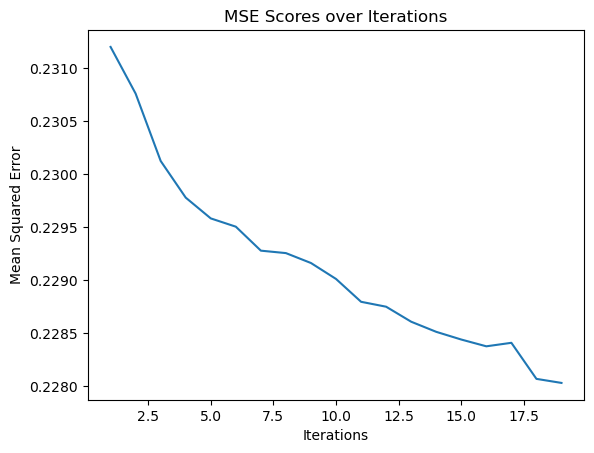

Lowest MSE: 0.2280320554454062
Features: Index(['Location', 'W', 'Shot_No', 'Game_Clock', 'Shot_Clock', 'Dribbles',
       'Touch_Time', 'Shot_Dist', 'Pts_Type', 'Close_Def_Dist'],
      dtype='object')
Best Regressor: MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=100, random_state=42)


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('cleaned_data.csv')

# Remove the unnecessary columns
X = data.drop(['Margin', 'Shot_Result', 'Player_Name', 'Closest_Defender'], axis=1)
y = data['Shot_Result']

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network regressor
regressor = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=100, random_state=42)

# Train the regressor on the training data and track the lowest MSE
lowest_mse = float('inf')
best_regressor = None

mse_scores = []
for i in range(1, 20):
    regressor.partial_fit(X_train_scaled, y_train)
    y_pred = regressor.predict(X_train_scaled)
    mse = mean_squared_error(y_train, y_pred)
    mse_scores.append(mse)
    
    if mse < lowest_mse:
        lowest_mse = mse
        best_regressor = regressor

# Make predictions on the testing data using the best regressor
y_pred_test = best_regressor.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)

# Plot the MSE scores over iterations
plt.plot(range(1, 20), mse_scores)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('MSE Scores over Iterations')
plt.show()

# Print the lowest MSE and the best regressor's features
print('Lowest MSE:', lowest_mse)
print('Features:', X.columns)
print('Best Regressor:', best_regressor)


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('cleaned_data.csv')

# Create X and y
X = df.drop(['Margin', 'Shot_Result', 'Player_Name', 'Closest_Defender'], axis=1)  # Removed 'Closest_Defender'
y = df['Shot_Result']

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model and train it (Logistic Regression)
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred = lr.predict(X_test)

# Evaluate the performance of the model (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Perform sensitivity analysis by modifying feature values
features_to_modify = ['Close_Def_Dist', 'Shot_Dist', 'Shot_Clock', 'Touch_Time']
delta_values = np.arange(-1, 1.1, 0.1)  # Delta values to modify the features

feature_avg_diff = {}

for feature in features_to_modify:
    print(f"\nSensitivity Analysis for {feature}:")
    feature_diffs = []
    for delta in delta_values:
        X_test_modified = X_test.copy()
        X_test_modified[feature] += delta

        y_pred_modified = lr.predict(X_test_modified)
        accuracy_modified = accuracy_score(y_test, y_pred_modified)
        feature_diffs.append(accuracy_modified - accuracy)

        print(f"Delta: {delta:.2f} | Accuracy: {accuracy_modified:.4f}")
    
    feature_avg_diff[feature] = np.mean(feature_diffs)

# Calculate average accuracy
average_accuracy = np.mean([accuracy] * len(delta_values))

# Print average accuracy and feature differences from the average
print("\nAverage Accuracy:", average_accuracy)
print("\nFeature Differences from Average:")
for feature, avg_diff in feature_avg_diff.items():
    print(f"{feature}: {avg_diff:.4f}")


C:\Users\KEITAPX20\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6027305469469805

Sensitivity Analysis for Close_Def_Dist:
Delta: -1.00 | Accuracy: 0.6095
Delta: -0.90 | Accuracy: 0.6099
Delta: -0.80 | Accuracy: 0.6089
Delta: -0.70 | Accuracy: 0.6076
Delta: -0.60 | Accuracy: 0.6068
Delta: -0.50 | Accuracy: 0.6056
Delta: -0.40 | Accuracy: 0.6044
Delta: -0.30 | Accuracy: 0.6037
Delta: -0.20 | Accuracy: 0.6030
Delta: -0.10 | Accuracy: 0.6031
Delta: -0.00 | Accuracy: 0.6027
Delta: 0.10 | Accuracy: 0.6029
Delta: 0.20 | Accuracy: 0.6024
Delta: 0.30 | Accuracy: 0.6020
Delta: 0.40 | Accuracy: 0.6016
Delta: 0.50 | Accuracy: 0.6004
Delta: 0.60 | Accuracy: 0.5993
Delta: 0.70 | Accuracy: 0.5984
Delta: 0.80 | Accuracy: 0.5974
Delta: 0.90 | Accuracy: 0.5965
Delta: 1.00 | Accuracy: 0.5948

Sensitivity Analysis for Shot_Dist:
Delta: -1.00 | Accuracy: 0.5998
Delta: -0.90 | Accuracy: 0.6002
Delta: -0.80 | Accuracy: 0.6012
Delta: -0.70 | Accuracy: 0.6017
Delta: -0.60 | Accuracy: 0.6018
Delta: -0.50 | Accuracy: 0.6024
Delta: -0.40 | Accuracy: 0.6025
Delta: